In [13]:
import pandas as pd
from scipy.io import arff

In [14]:
# Load the ARFF file
file_path = "dataset/iris.arff"
data, meta = arff.loadarff(file_path)

# Convert to DataFrame
df = pd.DataFrame(data)

# Decode byte strings in categorical column (if necessary)
df[df.select_dtypes([object]).columns] = df.select_dtypes([object]).apply(lambda x: x.str.decode('utf-8'))

# Display dataset info and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


(None,
    sepallength  sepalwidth  petallength  petalwidth        class
 0          5.1         3.5          1.4         0.2  Iris-setosa
 1          4.9         3.0          1.4         0.2  Iris-setosa
 2          4.7         3.2          1.3         0.2  Iris-setosa
 3          4.6         3.1          1.5         0.2  Iris-setosa
 4          5.0         3.6          1.4         0.2  Iris-setosa)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [16]:
# Separate features and target variable
X = df.iloc[:, :-1].values  # Feature matrix
y = df.iloc[:, -1].values   # Target variable

# Encode categorical labels into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for better NN and k-NN performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check the shape of the split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [18]:
# Train k-NN classifier
import time
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("Training time: %s seconds" % (time.time() - start_time))
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

Training time: 0.003339529037475586 seconds


0.9333333333333333

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [20]:
# Train Decision Tree classifier
import time
start_time = time.time()
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print("Training time: %s seconds" % (time.time() - start_time))
# Predict on test set
y_pred_dt = dt.predict(X_test)

# Evaluate performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2%}")

Training time: 0.004419803619384766 seconds
Decision Tree Accuracy: 90.00%


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (10, 10), (50, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [2000]
}

nn_grid = GridSearchCV(MLPClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
nn_grid.fit(X_train, y_train)

best_nn = nn_grid.best_estimator_
y_pred_nn = best_nn.predict(X_test)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Best Neural Network Accuracy: {accuracy_nn:.2%}")
print(f"Best Parameters: {nn_grid.best_params_}")


Best Neural Network Accuracy: 96.67%
Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'max_iter': 2000, 'solver': 'adam'}


In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time

# Best parameters from grid search
best_params = {
    'activation': 'tanh',
    'alpha': 0.0001,
    'hidden_layer_sizes': (10,),
    'max_iter': 2000,
    'solver': 'adam',
    'random_state': 42
}

# Initialize the neural network with the best parameters
best_nn = MLPClassifier(**best_params)

# Measure execution time
start_time = time.time()

# Train the neural network
best_nn.fit(X_train, y_train)

# Calculate training time
training_time = time.time() - start_time
print(f"Training time: {training_time:.4f} seconds")

# Predict on the test set
y_pred_nn = best_nn.predict(X_test)

# Calculate accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {accuracy_nn:.2%}")

Training time: 0.6683 seconds
Neural Network Accuracy: 96.67%


In [23]:
print(f"k-NN Accuracy: {accuracy_knn:.2%}")
print(f"Decision Tree Accuracy: {accuracy_dt:.2%}")
print(f"Neural Network Accuracy: {accuracy_nn:.2%}")


k-NN Accuracy: 93.33%
Decision Tree Accuracy: 90.00%
Neural Network Accuracy: 96.67%


In [24]:
# Select only petal length and petal width as features
X_selected = df[['petallength', 'petalwidth']].values
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Standardize
X_train_sel = scaler.fit_transform(X_train_sel)
X_test_sel = scaler.transform(X_test_sel)

# Retrain classifiers with selected features
knn.fit(X_train_sel, y_train)
dt.fit(X_train_sel, y_train)
best_nn.fit(X_train_sel, y_train)

# Evaluate performance
y_pred_knn_sel = knn.predict(X_test_sel)
y_pred_dt_sel = dt.predict(X_test_sel)
y_pred_nn_sel = best_nn.predict(X_test_sel)

print(f"k-NN Accuracy (Selected Features): {accuracy_score(y_test, y_pred_knn_sel):.2%}")
print(f"Decision Tree Accuracy (Selected Features): {accuracy_score(y_test, y_pred_dt_sel):.2%}")
print(f"Neural Network Accuracy (Selected Features): {accuracy_score(y_test, y_pred_nn_sel):.2%}")

k-NN Accuracy (Selected Features): 96.67%
Decision Tree Accuracy (Selected Features): 93.33%
Neural Network Accuracy (Selected Features): 96.67%


<Figure size 500x400 with 0 Axes>

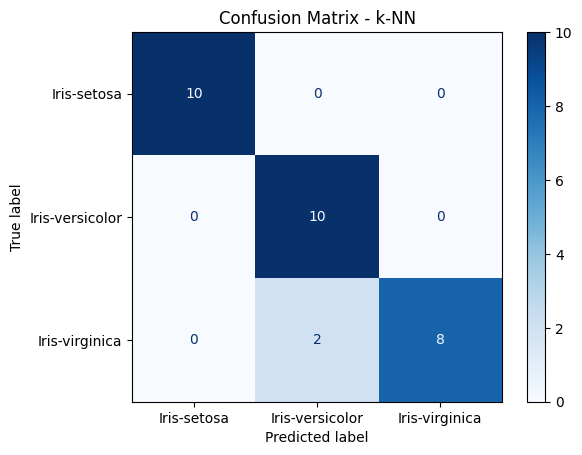

<Figure size 500x400 with 0 Axes>

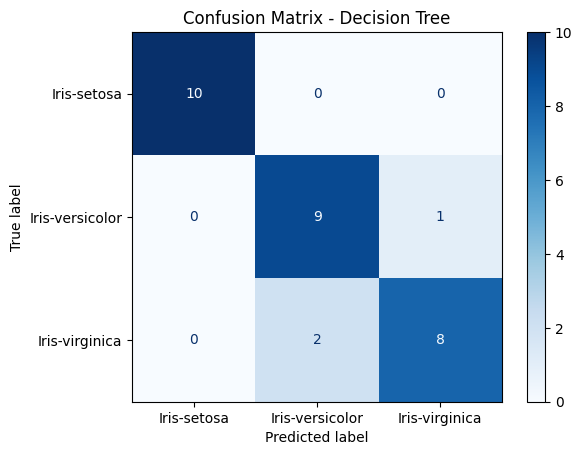

<Figure size 500x400 with 0 Axes>

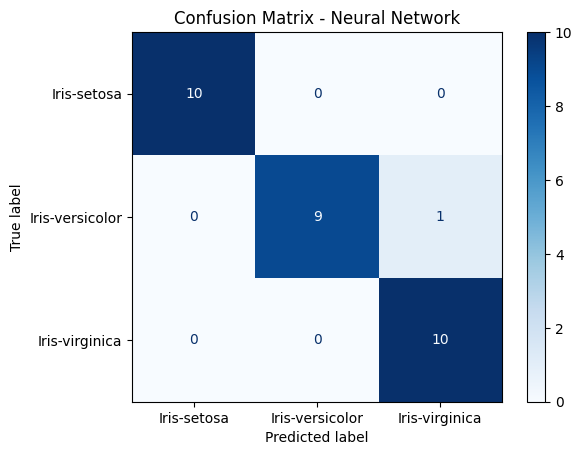

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = {'k-NN': y_pred_knn, 'Decision Tree': y_pred_dt, 'Neural Network': y_pred_nn}

for model_name, y_pred in models.items():
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    
    plt.figure(figsize=(5, 4))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()